In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
low_light = np.array([378, 346, 245, 285, 365, 245, 208, 360, 296, 224, 292])
high_light = np.array([218, 264, 211, 180, 256, 240, 261, 205, 145, 195, 187, 210, 378, 204, 232, 237, 310])
aggregated = np.concatenate((low_light, high_light))

# TEMP: no difference (null-hypothesis)
# np.random.shuffle(aggregated)
# low_light = aggregated[:11]
# high_light = aggregated[11:]

low_light_mean = low_light.mean()
high_light_mean = high_light.mean()
original_diff = abs(high_light_mean - low_light_mean)

low_light_mean, high_light_mean, original_diff

(294.90909090909093, 231.35294117647058, 63.556149732620355)

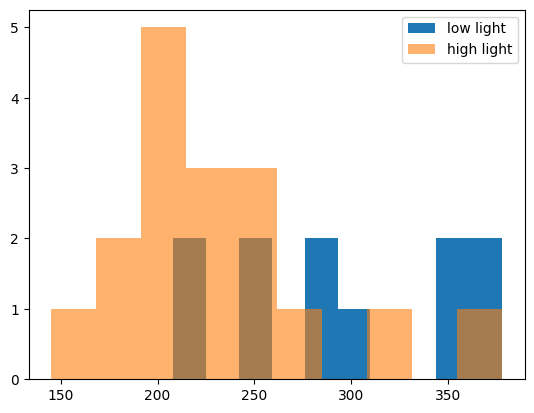

In [9]:
plt.hist(low_light, label='low light')
plt.hist(high_light, alpha=0.6, label='high light')
plt.legend()

In [12]:
diffs = np.zeros(1000)

for i in range(1000):
    np.random.shuffle(aggregated)  # shuffles in-place
    random_sample, rest_sample = aggregated[:11], aggregated[11:]
    random_sample_mean = random_sample.mean()
    rest_sample_mean = rest_sample.mean()

    diffs[i] = abs(random_sample_mean - rest_sample_mean)

diffs_95 = np.sort(diffs)[0:950]

greater_diffs_counter = (diffs > original_diff).sum()
p = greater_diffs_counter / len(diffs)
p

0.006

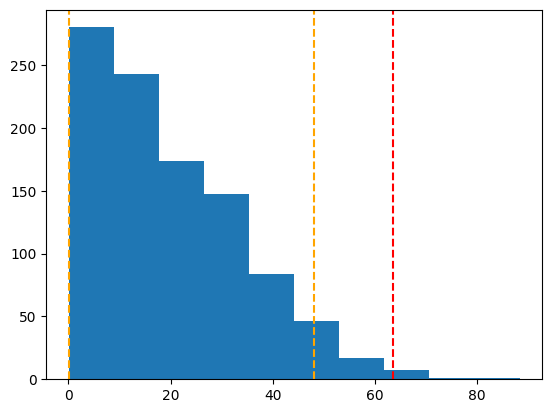

In [11]:
plt.hist(diffs)
ylim = plt.ylim()
plt.axvline(x=original_diff, c='r', linestyle='dashed')

plt.axvline(x=diffs_95[0], c='orange', linestyle='dashed')
plt.axvline(x=diffs_95[-1], c='orange', linestyle='dashed')
